## Problem Statement:

You are provided hourly rental data spanning two years.   
For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. 

You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period

`Input Features`:<br>
['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek','hour']<br>
       
`Target`:<br>
['count']<br>

Reference: https://www.kaggle.com/c/bike-sharing-demand/data

In [1]:
## libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
## read the data sets
df_train = pd.read_csv("../data/train.csv") 
display(df_train.head(3))

df_test = pd.read_csv("../data/test.csv")
display(df_test.head(3))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


## 1. Exploratory Data Analysis

In [3]:
## Data Information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [4]:
# ## Datetime object
# df_train["datetime"] = df_train["datetime"].astype('datetime64[ns]')
# df_test["datetime"] = df_test["datetime"].astype('datetime64[ns]')

df_train["datetime"] = pd.to_datetime(df_train["datetime"])
df_test["datetime"] = pd.to_datetime(df_test["datetime"])

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [6]:
## Data Information
print("No. of Rows      : ", df_train.shape[0])
print("No. of Columns   : ", df_train.shape[1])
print("\nFeatures : \n", df_train.columns.to_list())
print("\nMissing values in each column: \n", df_train.isnull().sum()) ## .any()
print("\nUnique values : \n", df_train.nunique())

No. of Rows      :  10886
No. of Columns   :  12

Features : 
 ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

Missing values in each column: 
 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

Unique values : 
 datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64


In [7]:
## Description of train dataset
df_train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


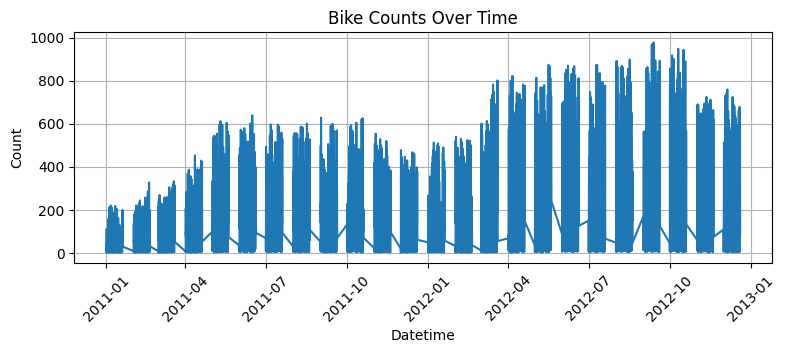

In [8]:
# Plot using seaborn
plt.figure(figsize=(9, 3))
sns.lineplot(data=df_train, x='datetime', y='count').set(title='Bike Counts Over Time')

# Optional: Format the x-axis for better readability
plt.xticks(rotation=45)
plt.xlabel("Datetime")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [9]:
## Bike count with season

print(df_train['season'].value_counts(dropna=False))


season
4    2734
2    2733
3    2733
1    2686
Name: count, dtype: int64


In [10]:
##  Extract year, month, day, dayofweek, and hour features from datetime

def add_features(df):
  
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.month
    df['hour'] = df['datetime'].dt.hour
#     df['year'] = pd.DatetimeIndex(df['datetime']).year
#     df['month'] = pd.DatetimeIndex(df['datetime']).month
#     df['day'] = pd.DatetimeIndex(df['datetime']).day
#     df['dayofweek'] = pd.DatetimeIndex(df['datetime']).dayofweek
#     df['hour'] = pd.DatetimeIndex(df['datetime']).hour

## Add new features

add_features(df_train)
add_features(df_test)

# ## check dataframes
display(df_train.head(3))
display(df_test.head(3))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,2


#### Set ''datetime" as a index

In [11]:
# Set 'datetime" as a index
# train = pd.read_csv("train.csv", index_col=0, parse_dates=['datetime'])
train = df_train.set_index('datetime')
display(train.head(3))

# test = pd.read_csv("test.csv", index_col=0, parse_dates=['datetime'])
test = df_test.set_index('datetime')
display(test.head(3))



,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
datetime,,,,,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,1,0
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,1
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,2


In [12]:
## just check data using "datetime" index
# train.loc['2011-01-01':'2011-02-01']

datetime
2011-01-01 00:00:00    16
2011-01-01 01:00:00    40
2011-01-01 02:00:00    32
2011-01-01 03:00:00    13
2011-01-01 04:00:00     1
Name: count, dtype: int64

<Axes: xlabel='datetime'>

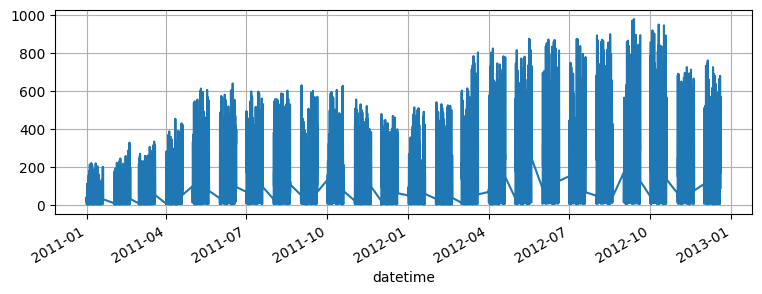

In [13]:
## Bike Count - "count"
bike_count = train['count']
display(bike_count.head())

plt.figure(figsize=(9,3))
bike_count.plot(grid=True)

<Axes: xlabel='datetime'>

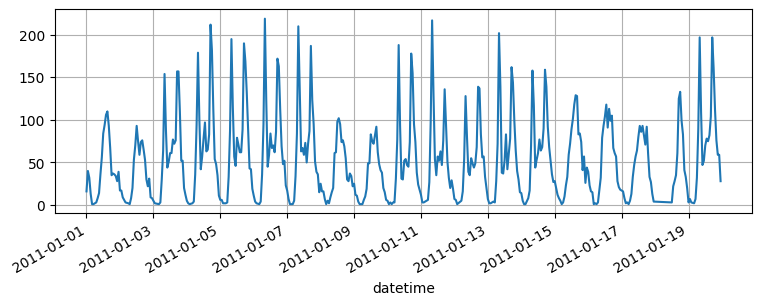

In [14]:
# plot monthly "Janauray" for Bike Coutns

plt.figure(figsize=(9,3))
train.loc['2011-01']['count'].plot(grid=True)

In [15]:
## checking years
train['year'].unique()

array([2011, 2012], dtype=int32)

#### Target Variable ("count") Analysis

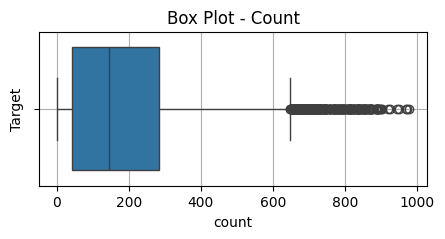

In [16]:
## Target Variable Analysis
plt.figure(figsize=(5, 2))
sns.boxplot(data=train["count"], orient="h")
plt.title('Box Plot - Count')
plt.ylabel('Target')
plt.grid(True)
plt.show()

### `Logarithmic transformation is a convenient means of transforming a highly skewed variable into a more normalized dataset`

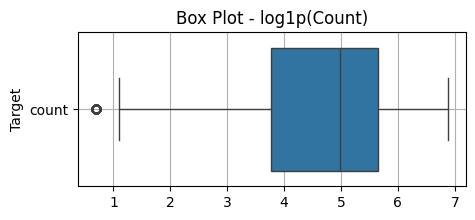

In [17]:
# Let's see how the data distribution changes with log1p
# Evenly distributed
plt.figure(figsize=(5, 2))
sns.boxplot([train['count'].map(np.log1p)], orient="h")
plt.title('Box Plot - log1p(Count)')
plt.ylabel('Target')
plt.grid(True)

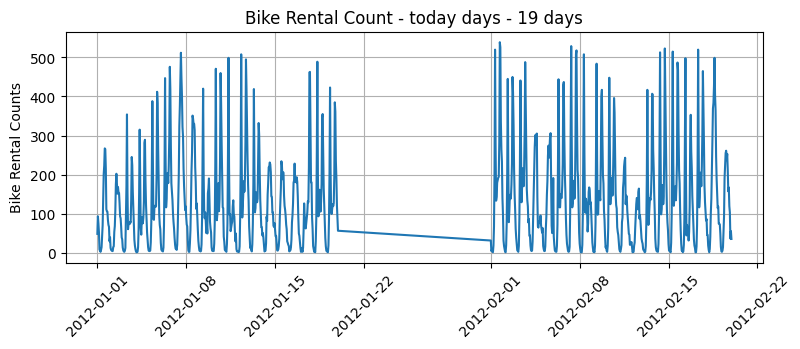

In [18]:
## According to question the data records are given only first 19 days of each month
## Lets check the missing data which days in month - 19 days
## for 2012 -- for January and February
## Month to month trend
plt.figure(figsize=(9,3))
plt.title("Bike Rental Count - today days - 19 days")
plt.plot(train['2012-01' : '2012-02']['count'])
plt.xticks(rotation=45)
plt.ylabel('Bike Rental Counts')
plt.grid(True)
plt.show()

In [19]:
train.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1


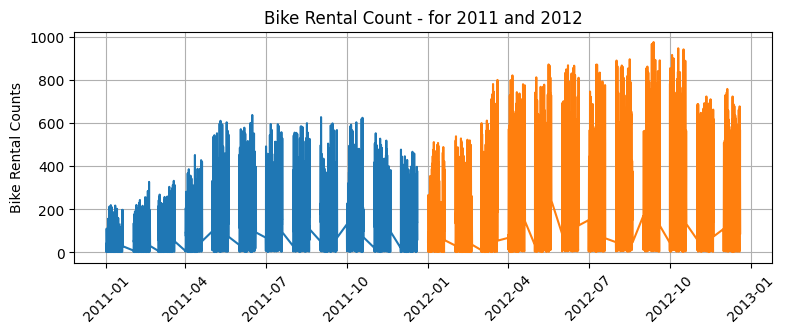

In [20]:
## Year to year trend
plt.figure(figsize=(9,3))
plt.title("Bike Rental Count - for 2011 and 2012")
plt.plot(train.loc['2011']['count'], label='2011')
plt.plot(train.loc['2012']['count'], label='2012')
plt.xticks(rotation=45)
plt.ylabel('Bike Rental Counts')
plt.grid(True)
plt.show()

-- We can clearly see the total days - 19 days gap between `2012-01-22` to `2012-02-01`

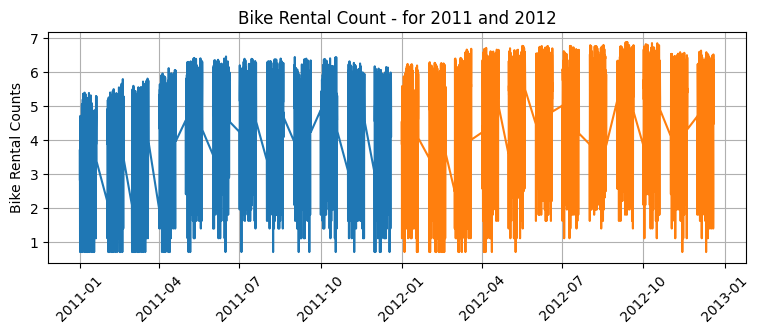

In [21]:
## Year to year trend
plt.figure(figsize=(9,3))
plt.title("Bike Rental Count - for 2011 and 2012")
plt.plot(train.loc['2011']['count'].map(np.log1p), label='2011')
plt.plot(train.loc['2012']['count'].map(np.log1p), label='2012')
plt.xticks(rotation=45)
plt.ylabel('Bike Rental Counts')
plt.grid(True)
plt.show()


### It will be good idea to train the model using log transformed target feature `count`

We will do after exploring data


#### Monthly Statisitics for the "No. of Bike Counts"

In [22]:

train[['month', 'count']].groupby('month').describe()

count                                                          
       count        mean         std  min    25%    50%     75%    max
month                                                                 
1      884.0   90.366516   95.302518  1.0  20.00   65.0  123.00  512.0
2      901.0  110.003330  109.802322  1.0  26.00   78.0  157.00  539.0
3      901.0  148.169811  155.352814  1.0  26.00  100.0  219.00  801.0
4      909.0  184.160616  182.417619  1.0  35.00  133.0  277.00  822.0
5      912.0  219.459430  189.320173  1.0  56.00  182.0  323.50  873.0
6      912.0  242.031798  199.628690  1.0  73.75  206.0  363.00  869.0
7      912.0  235.325658  184.857337  1.0  77.25  209.5  358.50  872.0
8      912.0  234.118421  197.198461  1.0  67.75  193.0  337.25  897.0
9      909.0  233.805281  208.915910  1.0  58.00  188.0  349.00  977.0
10     911.0  227.699232  204.079411  1.0  57.00  180.0  342.00  948.0
11     911.0  193.677278  165.420965  1.0  53.50  162.0  284.00  724.0
12     912.0  175.614035  155.926050  1.0  45.00  138.0  257.00  759.0

#### Monthly rental -- 19 days only

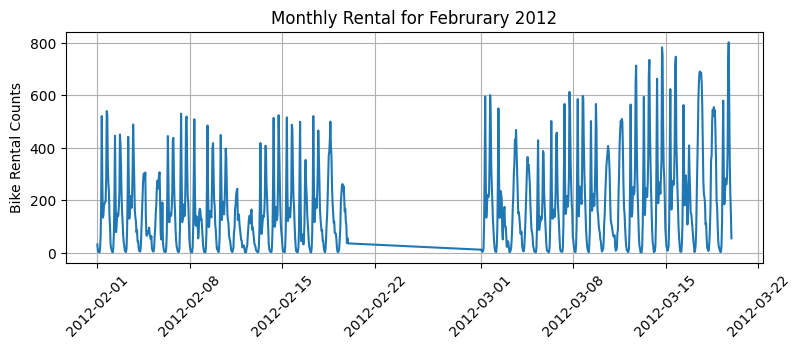

In [23]:

plt.figure(figsize=(9,3))
plt.title("Monthly Rental for Februrary 2012")
plt.plot(train.loc['2012-02':'2012-03']['count'])
plt.plot
plt.xticks(rotation=45)
plt.ylabel("Bike Rental Counts")
plt.grid(True)
plt.show()

#### Average hourly bike rental for both 2011 and 2012


hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: count, dtype: float64


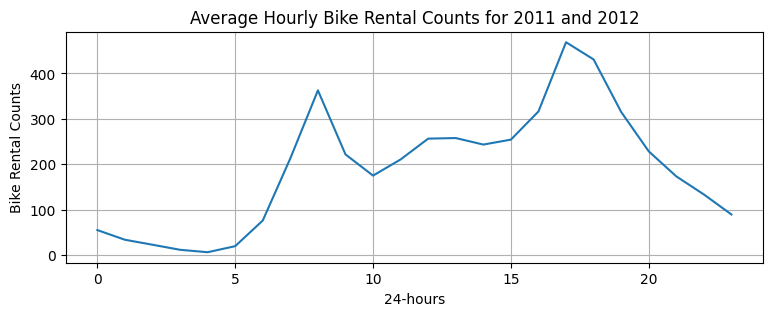

In [24]:
## Average hourly bike rental for both 2011 and 2012
hourly = train.groupby(['hour'])
avg_hour = hourly['count'].mean()
print(avg_hour)

# plot
plt.figure(figsize=(9,3))
plt.title("Average Hourly Bike Rental Counts for 2011 and 2012")
plt.plot(avg_hour.index, avg_hour)
plt.xlabel("24-hours")
plt.ylabel("Bike Rental Counts")
plt.grid(True)
plt.show()

#### Average monthly bike rental for both 2011 and 2012


In [25]:
# print(avg_yearly_monthly.index.levels[0])
# print(avg_yearly_monthly.index.levels[1])

year  month
2011  1         54.645012
      2         73.641256
      3         86.849776
      4        111.026374
      5        174.809211
      6        196.877193
      7        203.614035
      8        182.666667
      9        174.622517
      10       174.773626
      11       155.458333
      12       134.173246
2012  1        124.353201
      2        145.646154
      3        208.276923
      4        257.455947
      5        264.109649
      6        287.186404
      7        267.037281
      8        285.570175
      9        292.598684
      10       280.508772
      11       231.980220
      12       217.054825
Name: count, dtype: float64


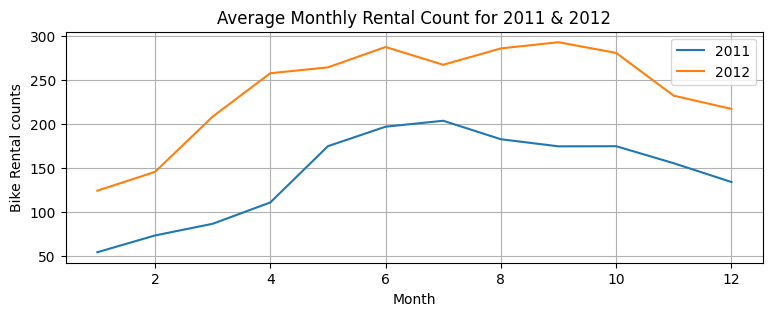

In [26]:
## Average monthly bike rental for both 2011 and 2012
yearly_monthly = train.groupby(['year', 'month'])
avg_yearly_monthly = yearly_monthly['count'].mean()
print(avg_yearly_monthly)

# plot
plt.figure(figsize=(9,3))
for year in avg_yearly_monthly.index.levels[0]:
    plt.plot(avg_yearly_monthly[year].index, avg_yearly_monthly[year], label=year)
plt.title("Average Monthly Rental Count for 2011 & 2012")
plt.xlabel("Month")
plt.ylabel("Bike Rental counts")
plt.legend()
plt.grid(True)
plt.show()

#### Average hourly bike rental for both 2011 and 2012

year  hour
2011  0        43.563877
      1        26.831858
      2        19.307692
      3        10.056872
      4         5.255814
      5        14.517857
      6        57.519824
      7       157.110132
      8       264.973568
      9       164.488987
      10      131.867841
      11      156.577093
      12      192.188596
      13      191.991228
      14      182.486842
      15      187.701754
      16      236.907895
      17      353.855263
      18      322.043860
      19      236.017544
      20      173.324561
      21      134.118421
      22      103.833333
      23       69.605263
2012  0        66.662281
      1        40.824561
      2        26.396476
      3        13.373874
      4         7.497797
      5        24.925439
      6        94.916667
      7       268.877193
      8       460.135965
      9       278.820175
      10      218.127193
      11      264.535088
      12      320.828947
      13      323.583333
      14      304.399123
      15      

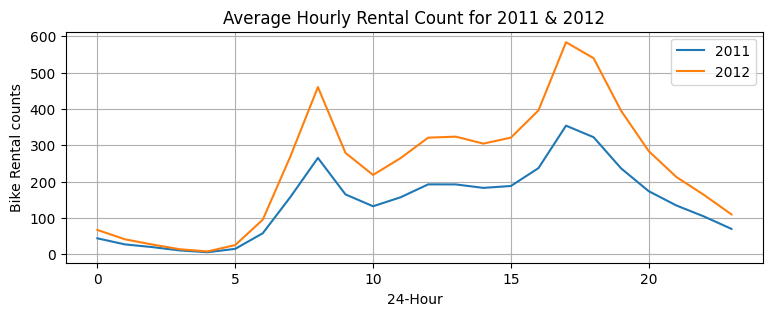

In [27]:
## Average hourly bike rental for both 2011 and 2012
yearly_hourly = train.groupby(['year', 'hour'])
avg_yearly_hourly = yearly_hourly['count'].mean()
print(avg_yearly_hourly)

# plot
plt.figure(figsize=(9,3))
for year in avg_yearly_hourly.index.levels[0]:
    plt.plot(avg_yearly_hourly[year].index, avg_yearly_hourly[year], label=year)
plt.title("Average Hourly Rental Count for 2011 & 2012")
plt.xlabel("24-Hour")
plt.ylabel("Bike Rental counts")
plt.legend()
plt.grid(True)
plt.show()

#### Working day Average hourly bike rental for both 2011 and 2012


Working Day level [0 1]
workingday  hour
0           0        94.489655
            1        71.910345
            2        53.748252
            3        25.534722
            4         8.544828
            5         9.373239
            6        19.993103
            7        47.268966
            8       112.255172
            9       177.924138
            10      263.806897
            11      325.386207
            12      379.110345
            13      387.820690
            14      378.731034
            15      373.703448
            16      367.648276
            17      339.124138
            18      292.248276
            19      242.344828
            20      183.806897
            21      148.737931
            22      123.351724
            23       90.606897
1           0        36.732258
            1        16.003236
            2         8.436066
            3         4.892734
            4         5.363636
            5        24.529032
            6       102.57741

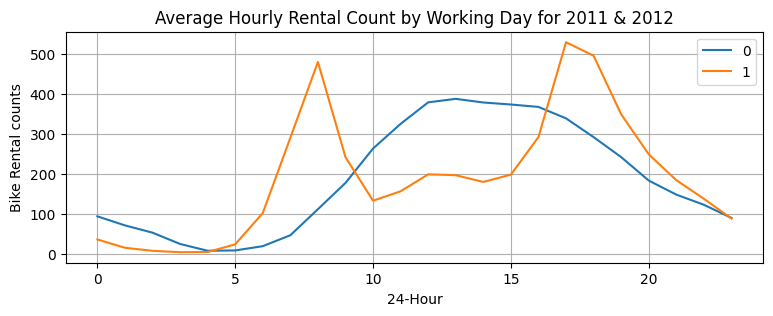

In [28]:
## Working day Average hourly bike rental for both 2011 and 2012
print("Working Day level", train["workingday"].unique())
workingday_hour = train.groupby(['workingday','hour'])
avg_workingday_hour = workingday_hour['count'].mean()
print(avg_workingday_hour)

# plot
plt.figure(figsize=(9,3))
for workingday in avg_workingday_hour.index.levels[0]:
    plt.plot(avg_workingday_hour[workingday].index, avg_workingday_hour[workingday], label=workingday)

plt.title("Average Hourly Rental Count by Working Day for 2011 & 2012")
plt.xlabel("24-Hour")
plt.ylabel("Bike Rental counts")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
## 
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


### Multivariate Analysis

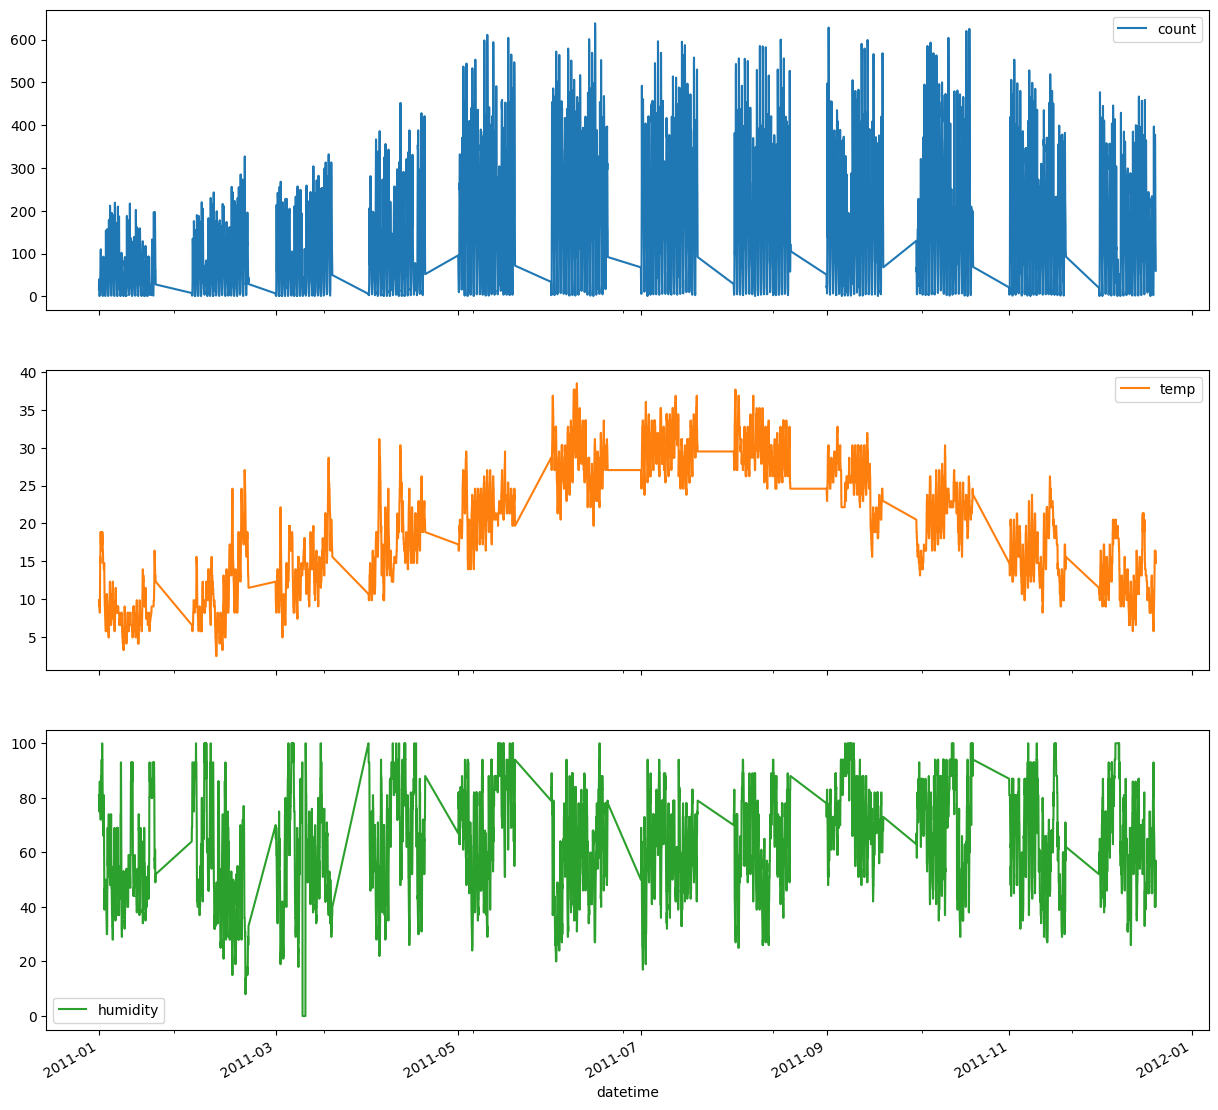

In [30]:

#2011
train_2011 = train.loc["2011"]
bike_count_2011 = train_2011[['count', 'temp', 'humidity']]
bike_count_2011.plot(subplots=True, figsize=(15, 15));


In [31]:
## Statistics
train.loc['2011':'2012'][['count', 'temp', 'humidity']] \
.groupby('count').agg({'temp':['min', 'max'], 'humidity':['min', 'max']})

temp        humidity     
         min    max      min  max
count                            
1       0.82  27.06        0  100
2       0.82  29.52        0  100
3       1.64  29.52        0  100
4       3.28  31.16       32  100
5       4.10  31.16       24  100
...      ...    ...      ...  ...
943    21.32  21.32       39   39
948    23.78  23.78       43   43
968    25.42  25.42       35   35
970    28.70  28.70       28   28
977    27.06  27.06       44   44

[822 rows x 4 columns]

## Pairplot

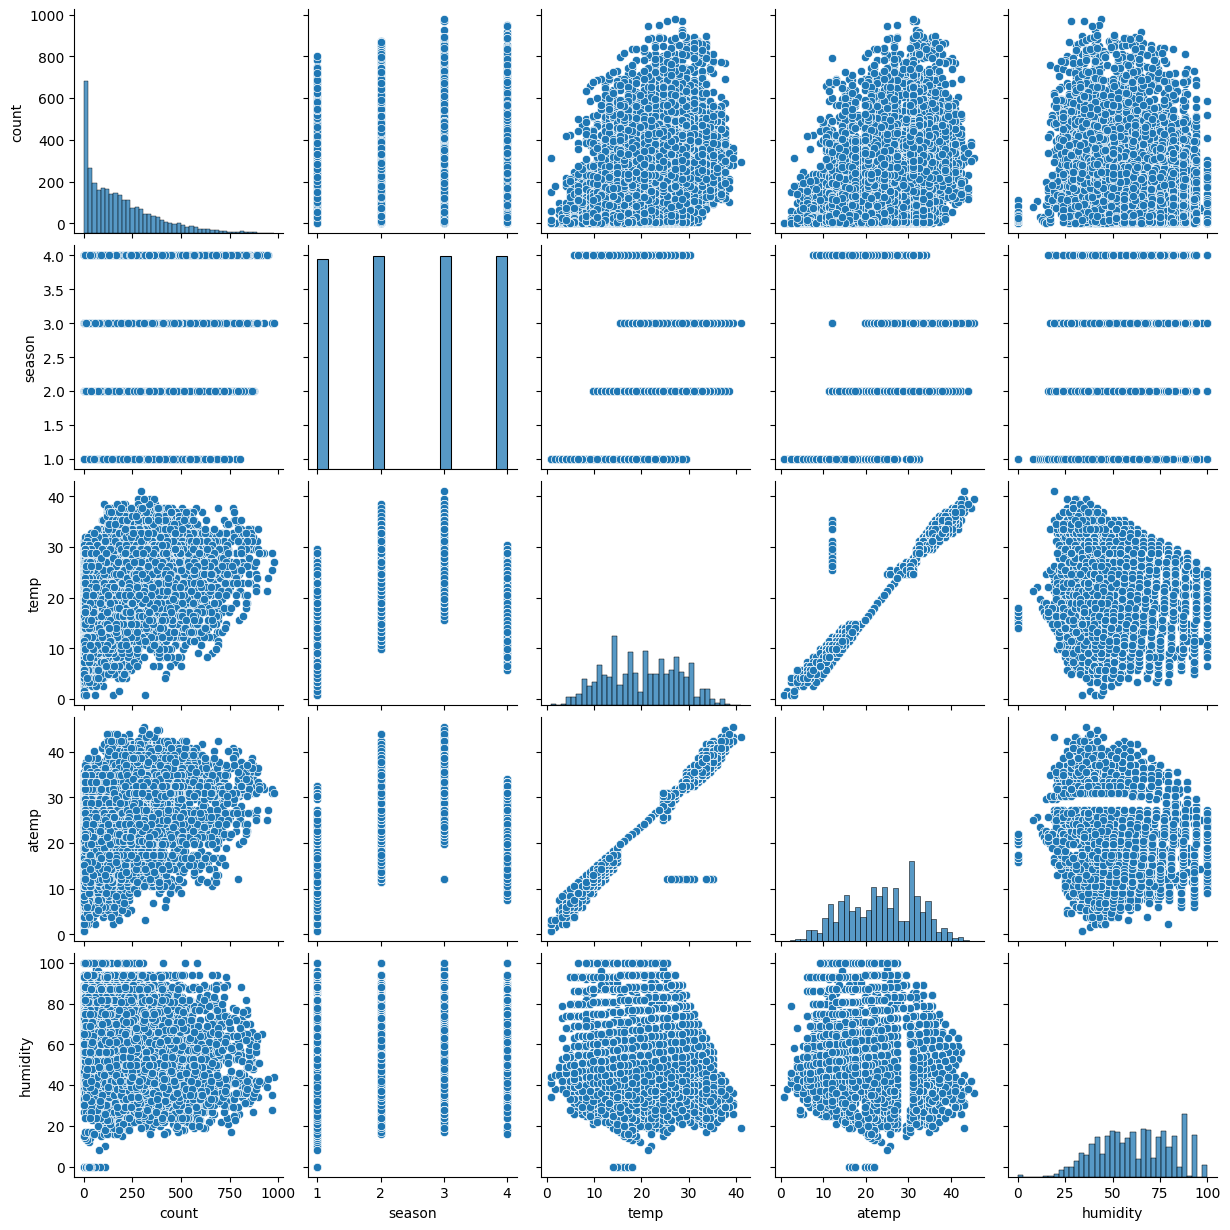

In [32]:
### pairplot
g1 = sns.pairplot(train[['count', 'season', 'temp', 'atemp', 'humidity']])

### Correlation Matrix

 Heat map for categorical columns: 


<Axes: >

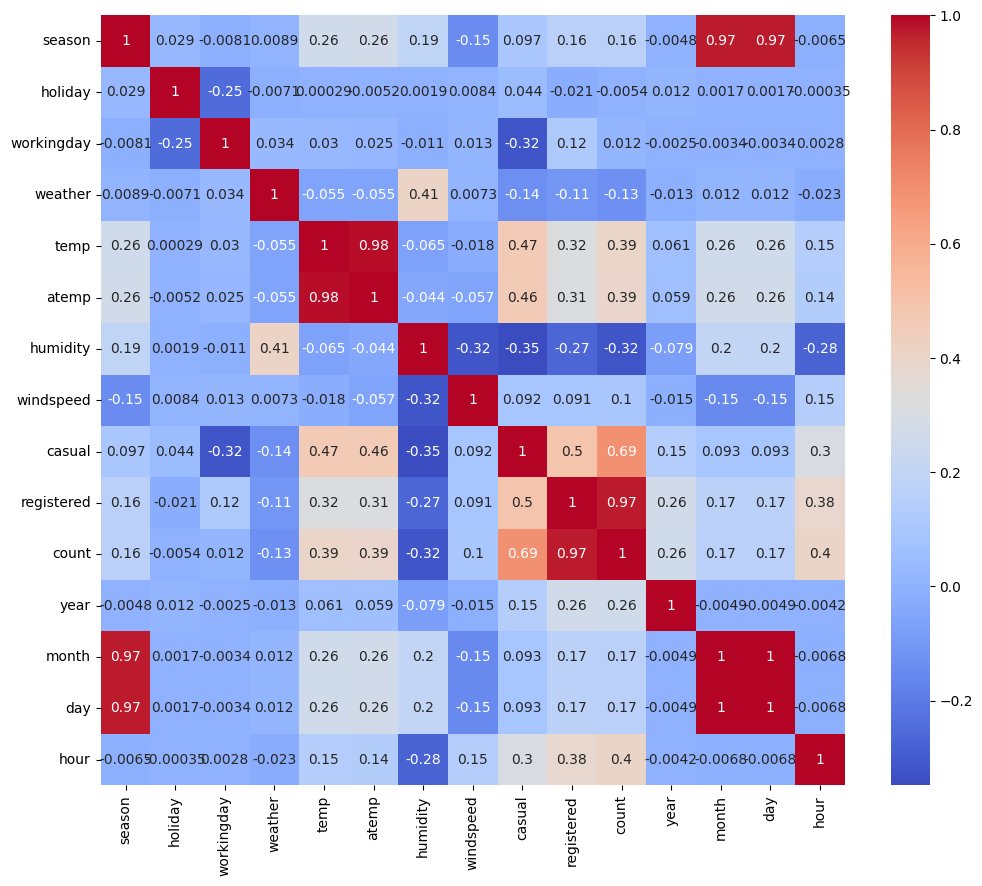

In [33]:
## Correlations between numerical features & Target feature
corr_matrix = train.corr()
# display(corr_matrix)

print(" Heat map for categorical columns: ")
plt.subplots(figsize=(12,10))
display(sns.heatmap(corr_matrix, annot = True, cmap= 'coolwarm'))

In [34]:
train.columns.tolist()

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'day',
 'hour']

[1 2 3 4]


<Axes: xlabel='weather', ylabel='count'>

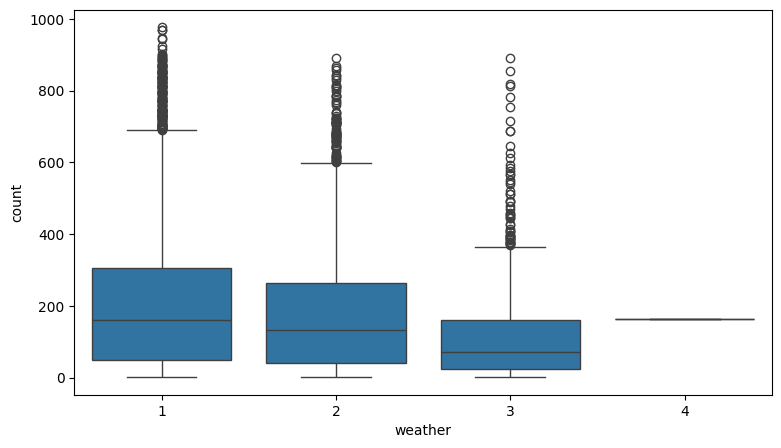

In [35]:
## Relationship between between weather and rental count
print(train["weather"].unique())
plt.figure(figsize=(9,5))
sns.boxplot(x='weather', y='count', data=train)

Text(0, 0.5, 'Bike Rental Counts')

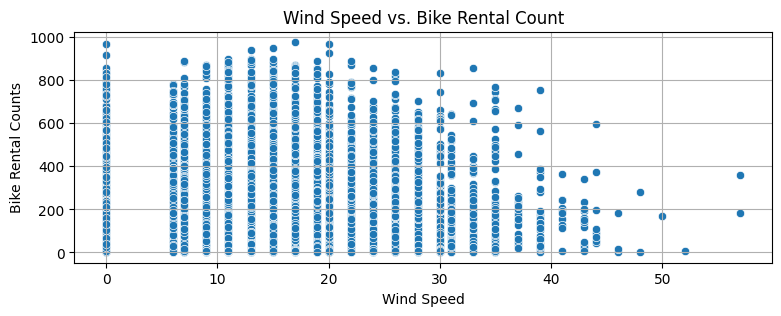

In [36]:
## Relationship between between wind speed and rental count
plt.figure(figsize=(9,3))
plt.grid(True)
sns.scatterplot(x='windspeed', y='count', data=train)
plt.title("Wind Speed vs. Bike Rental Count")
plt.xlabel("Wind Speed")
plt.ylabel("Bike Rental Counts")

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

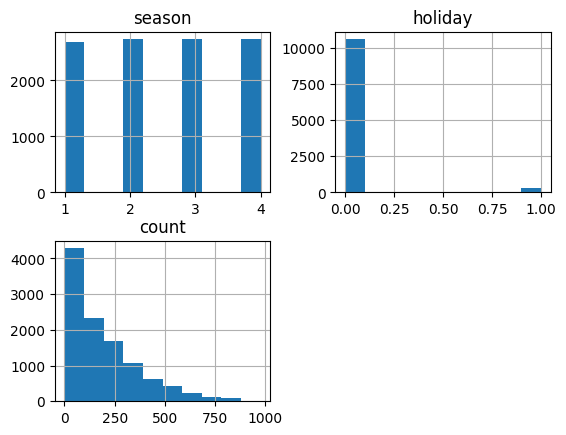

In [37]:
## Histogram for Temperature and Wind
train[['season', 'holiday', 'count']].hist()

#### Average Hourly Rental Count by season for 2011 & 2012

season  hour
1       0        28.292035
        1        18.761062
        2        13.205607
        3         7.760417
        4         3.336634
                   ...    
4       19      299.359649
        20      214.561404
        21      162.877193
        22      126.412281
        23       89.298246
Name: count, Length: 96, dtype: float64


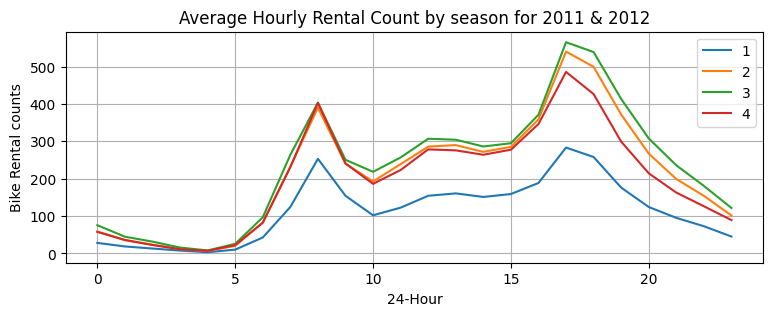

In [38]:
season_hour = train.groupby(['season','hour'])
avg_season_hour =season_hour['count'].mean()
print(avg_season_hour)

# plot
plt.figure(figsize=(9,3))
for season in avg_season_hour.index.levels[0]:
    plt.plot(avg_season_hour[workingday].index, avg_season_hour[season], label=season)

plt.title("Average Hourly Rental Count by season for 2011 & 2012")
plt.xlabel("24-Hour")
plt.ylabel("Bike Rental counts")
plt.legend()
plt.grid(True)
plt.show()

## Resampling

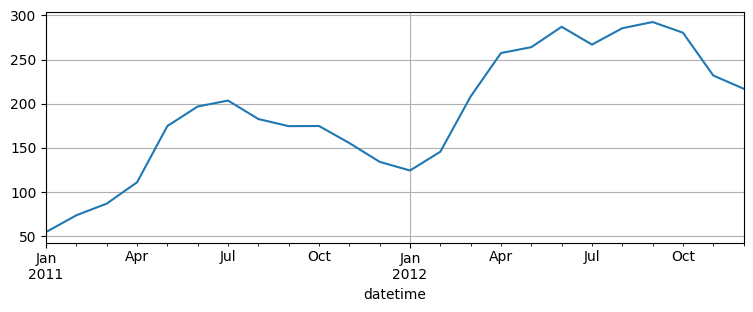

In [39]:
# "Monthly"
plt.figure(figsize=(9,3))
train['count'].resample('ME').mean().plot(grid=True);

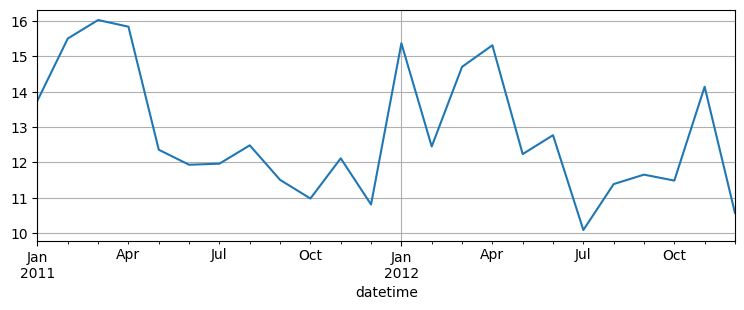

In [40]:
# "Season"
# "Monthly"
plt.figure(figsize=(9,3))
train['windspeed'].resample('ME').mean().plot(grid=True);

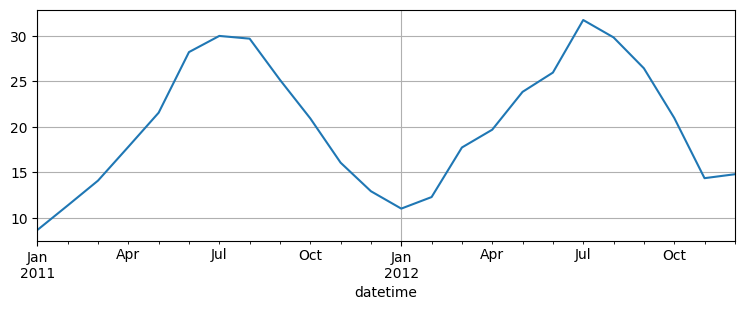

In [41]:
# "Season"
# "temp"
plt.figure(figsize=(9,3))
train['temp'].resample('ME').mean().plot(grid=True);

## 2. Statistics

### Autocorrelation 
an autocovariance that does not depend on time for "Stationary Timer Series"

In [42]:
print(5300/24)
print(365-228)
print(24*11)

220.83333333333334
137
264


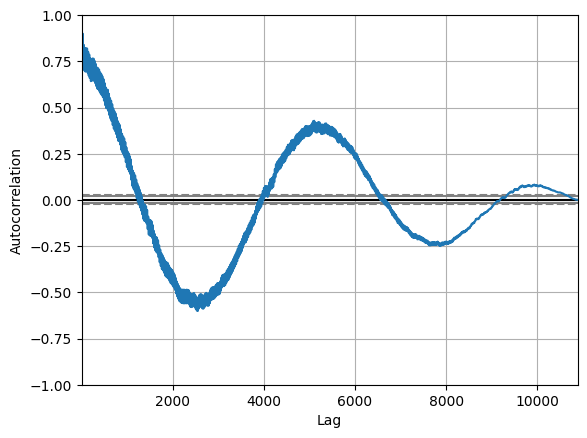

In [43]:
pd.plotting.autocorrelation_plot(train.loc['2011':'2012']['temp']);
## Note: Around 5000 -> 208*24 ~ 5000
# Correlation every year because there is peak

## This plot clearly says there are missing data ~ 365-208 = 157 which is ~ 24 (months) * 11 = 

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

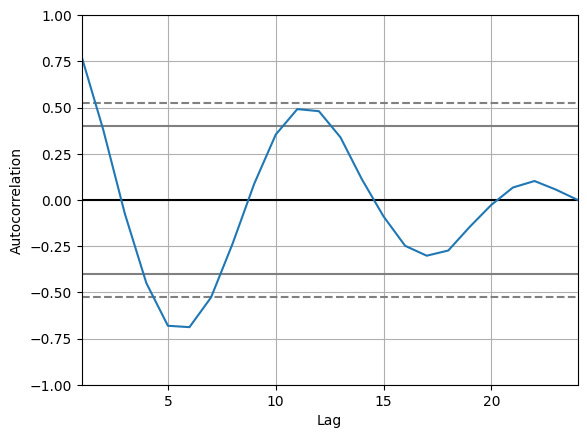

In [44]:
##
pd.plotting.autocorrelation_plot(train.loc['2011':'2012']['temp'].resample("ME").mean())
# Note: Peak very 12 months --> 1 year 
# ----> There is seasonality

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

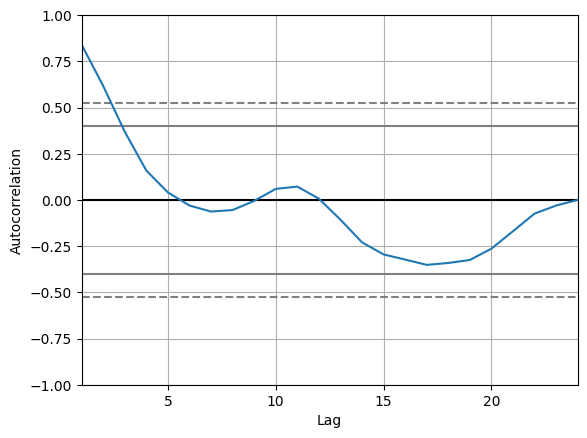

In [45]:
## "Bike Counts"
pd.plotting.autocorrelation_plot(train.loc['2011':'2012']['count'].resample("ME").mean())
# Note: Peak very 12 months --> 1 year 
# ----> There is not seasonality

## Methods to Check Stationarity
### `KPSS Test` : 

KPSS (Kwiatkowski-Phillips-Schmidt-Shin) checks the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.

The authors of the KPSS test have defined the null hypothesis as the process is trend stationary, to an alternate hypothesis of a unit root series. We will understand the trend stationarity in detail in the next section. For now, let’s focus on the implementation and see the results of the KPSS test.

Null Hypothesis: The process is trend stationary.

Alternate Hypothesis: The series has a unit root (series is not stationary).checks the stationarity of a time series (slightly less popular than the Dickey Fuller test). The null and alternate hypothesis for the KPSS test are opposite that of the ADF test, which often creates confusion.



### `ADF Test` :
The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

Null Hypothesis: The series has a unit root (value of a =1)

Alternate Hypothesis: The series has no unit root.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary (we will understand more about difference stationary in the next section).

Example: <br>
`ARMA` - Stationery Time Series Data <br>
`ARIMA` - Non-Stationery Time Series Data

#### `KPSS Test`  :
`Null hypothesis` - Series is stationary <br>
`Alternate hypothesis` - Series is not stationary

In [46]:
from statsmodels.tsa.stattools import kpss

In [47]:
stats, p, lags, critical_values = kpss(train['count'], 'ct') # 'ct' is trend component

C:\Users\yrobi\AppData\Local\Temp\ipykernel_29816\1992899546.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  stats, p, lags, critical_values = kpss(train['count'], 'ct') # 'ct' is trend component


In [48]:
print(f'Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critical Values: {critical_values}')

if p < 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: 1.5940148061897612
p-value: 0.01
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Series is not stationary


#### `ADF Test` :
`Null hypothesis` - Series possesses a unit root and hence is not stationary <br>
`Alternate hypothesis` - Series is stationary

In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
# result =  adfuller(train['count'])
result =  adfuller(train['season'])
result

(np.float64(-1.7397043856893644),
 np.float64(0.4107803439776853),
 0,
 10885,
 {'1%': np.float64(-3.4309509042528803),
  '5%': np.float64(-2.861805566312687),
  '10%': np.float64(-2.5669113558164036)},
 np.float64(-40624.69071545879))

In [51]:
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

if result[1] > 0.05:
    print("Series is not stationary")
else:
    print("Series is stationary")

Test Statistics: -1.7397043856893644
p-value: 0.4107803439776853
Critical Values: {'1%': np.float64(-3.4309509042528803), '5%': np.float64(-2.861805566312687), '10%': np.float64(-2.5669113558164036)}
Series is not stationary


- Tranforming target variable


In [52]:
train["count"] = train["count"].map(np.log1p)
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,4


### Training and Validation Set
#### Training and validation files without column header

In [53]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(train.index)
np.random.shuffle(l) ## shuffling the train data
df_train = train.loc[l]

In [54]:
## Splitting data for train and validation
rows = df_train.shape[0]
train = int(.7 * rows)
valid = rows- train
print(rows, train, valid)

10886 7620 3266


In [55]:
## check column name
col = df_train.columns.tolist()
print(col)

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'year', 'month', 'day', 'hour']


In [56]:
## target variable need to first columns for the xgboost
columns = ['count', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day','hour']

In [57]:
# df_train.iloc[:train]

In [58]:
# Write Training Set
df_train.iloc[:train].to_csv('../data/rob_bike_train.csv',
                             index=False,
                             header=False,
                             columns=columns)
# Write Validation Set
df_train.iloc[train:].to_csv('../data/rob_bike_validation.csv',
                       index=False,
                       header=False,
                       columns=columns)

## check
check_train = pd.read_csv("../data/rob_bike_train.csv", names=columns)
check_train.head()

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,4.477337,3,0,0,2,26.24,30.305,73,7.0015,2011,9,9,0
1,5.517453,3,0,1,1,32.80,34.850,33,7.0015,2012,8,8,14
2,5.814131,4,0,0,1,15.58,19.695,40,11.0014,2011,11,11,17
3,6.436150,3,0,1,1,32.80,37.880,55,12.9980,2012,8,8,19
4,4.262680,2,0,1,1,13.94,17.425,76,7.0015,2011,4,4,6


In [59]:
# Test Data has only input features
df_test.to_csv('../data/rob_bike_test.csv', index=True, index_label='datetime')
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,1,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,1,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,1,4


In [60]:
print(','.join(columns))
# Write Column List
with open('../data/rob_bike_train_column_list.txt','w') as f:
    f.write(','.join(columns))

count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
